In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import the data from medical_examination.csv and assign it to the df variable.

In [3]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


###  Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [5]:
bmi = df['weight'] /((df['height']/100)**2)
overweight = []
for i in bmi:
    if i>25:
        overweight.append(0)
    else:
        overweight.append(1)
df['overweight'] = overweight        

In [6]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1


###  Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [8]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x ==1 else 1)

In [9]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1


###  Draw the Categorical Plot in the draw_cat_plot function.

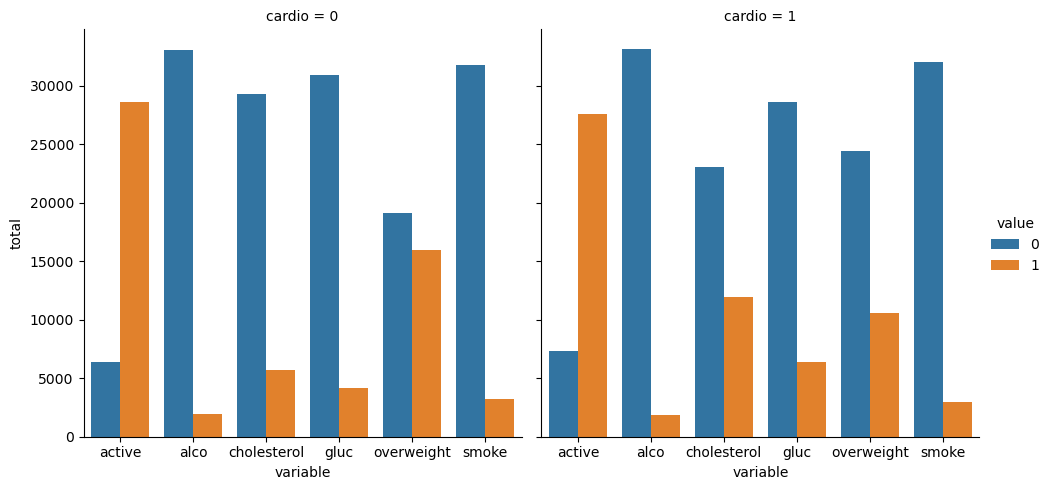

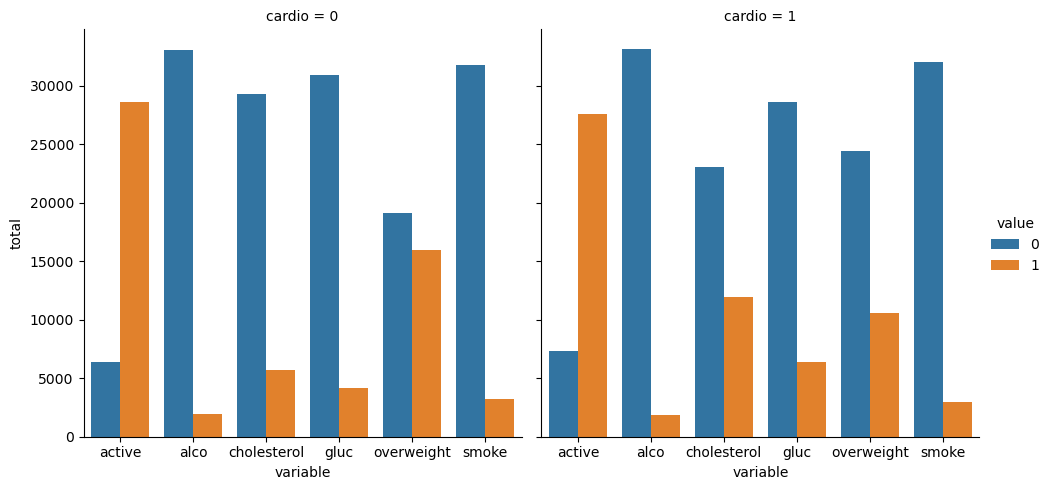

In [40]:
def draw_cat_plot():

    # Create DataFrame for cat plot using pd.melt
    df_cat = pd.melt(df, 
                     id_vars=['cardio'], 
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    #  Group and reformat the data to show counts for each cardio & category value
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']) \
                   .size() \
                   .reset_index(name='total')

   
    # Draw the catplot with 'sns.catplot()'
    catplot = sns.catplot(data=df_cat, x='variable', y='total', col='cardio', kind='bar', hue='value')


    # Get the figure for the output
    fig = catplot.fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

### Draw the Heat Map in the draw_heat_map function.

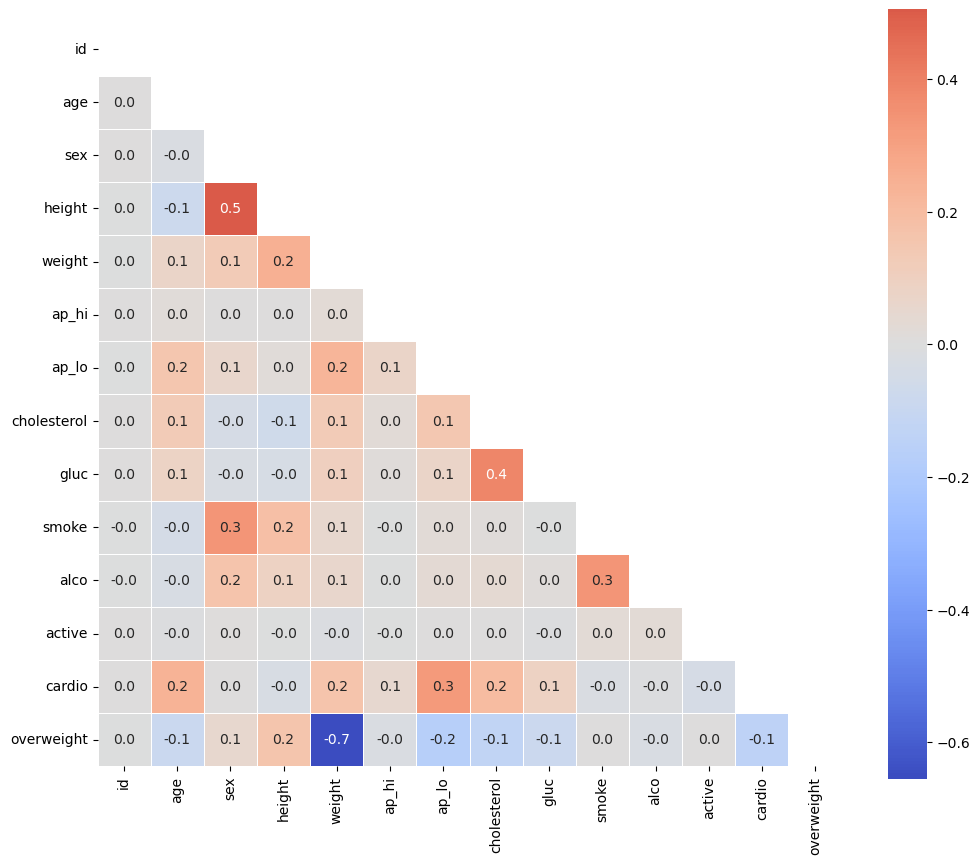

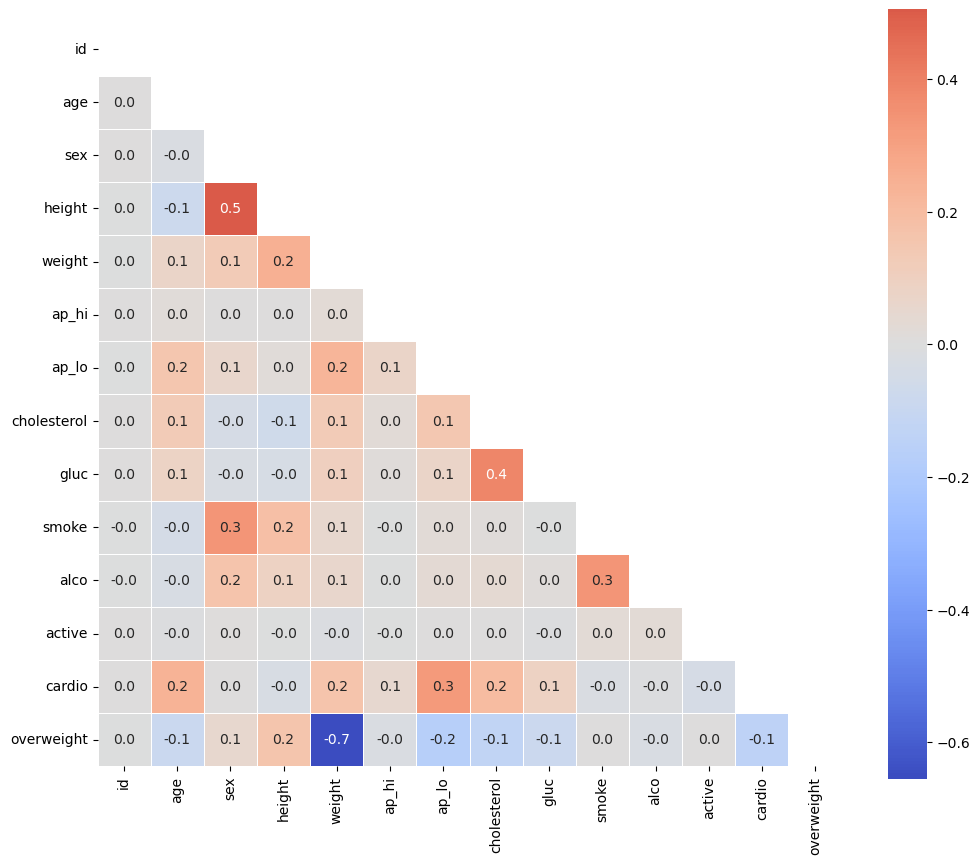

In [56]:
def draw_heat_map():
    # Clean the data
    df_heat = df[df['ap_lo'] <= df['ap_hi']]
    df_heat = df_heat[df_heat['height'] >= df_heat['height'].quantile(0.025)]
    df_heat = df_heat[df_heat['height'] <= df_heat['height'].quantile(0.975)]
    df_heat = df_heat[df_heat['weight'] >= df_heat['weight'].quantile(0.025)]
    df_heat = df_heat[df_heat['weight'] <= df_heat['weight'].quantile(0.975)]

    # Calculate correlation
    corr = df_heat.corr()

    # Generate mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw heatmap
    sns.heatmap(corr,
                mask=mask,
                cmap='coolwarm',
                square=True,
                annot=True,
                fmt=".1f",
                center=0,
                linewidths=0.5,
                ax=ax)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()
